In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


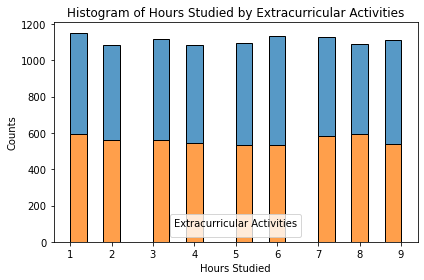

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


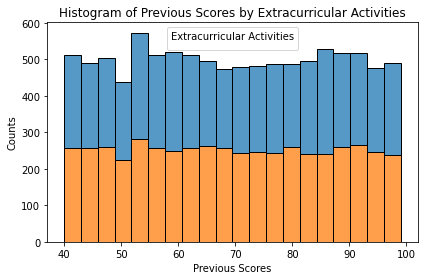

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


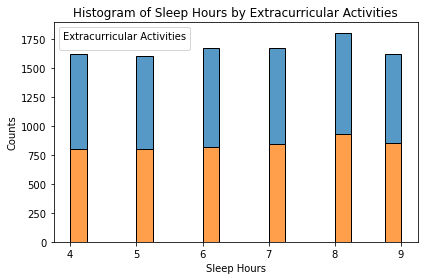

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


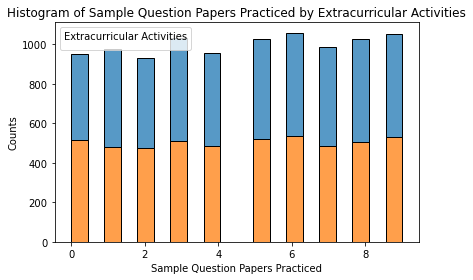

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


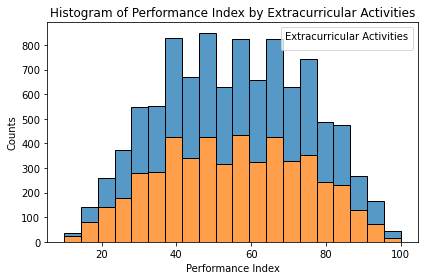

In [5]:
for column in df.columns:
    if column != "Extracurricular Activities":
        sns.histplot(data=df, x=column, hue="Extracurricular Activities", multiple="stack", bins=20)
        plt.title(f"Histogram of {column} by Extracurricular Activities")
        plt.xlabel(column)
        plt.ylabel("Counts")
        plt.legend(title="Extracurricular Activities")
        plt.tight_layout()
        plt.show()

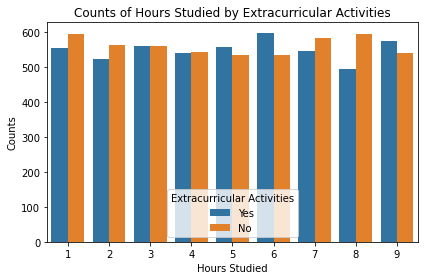

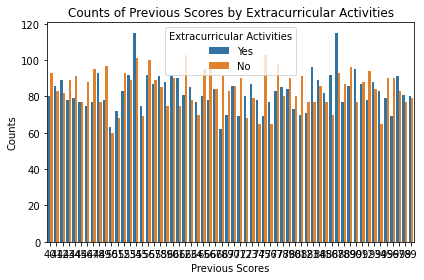

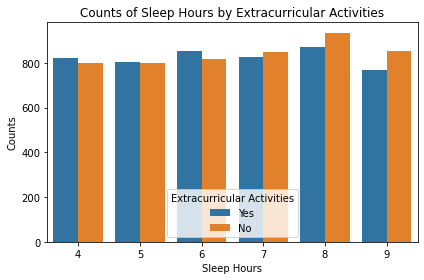

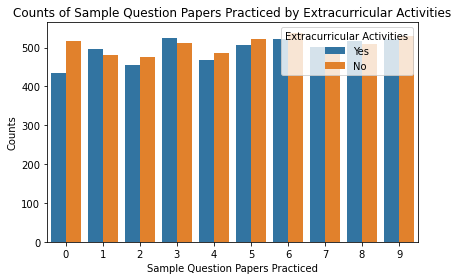

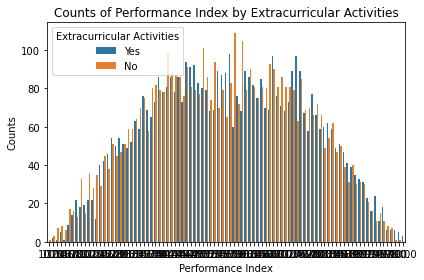

In [6]:
def create_yes_no_plot(column):
    sns.countplot(data=df, x=column, hue="Extracurricular Activities")
    plt.title(f"Counts of {column} by Extracurricular Activities")
    plt.xlabel(column)
    plt.ylabel("Counts")
    plt.legend(title="Extracurricular Activities")
    plt.tight_layout()
    plt.show()

# Make a plot of "Yes" and "No" counts for all columns
for column in df.columns:
    if column != "Extracurricular Activities":  # Exclude the Extracurricular Activities column itself
        create_yes_no_plot(column)

In [7]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

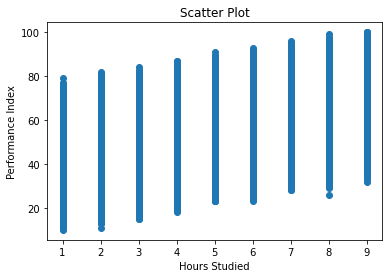

In [8]:
plt.scatter(df['Hours Studied'],df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Scatter Plot')
plt.show()

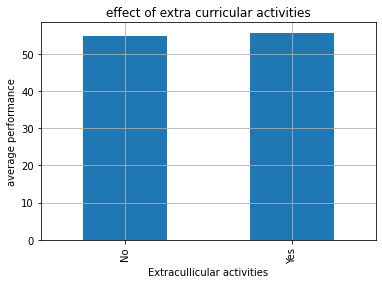

In [9]:
g = df.groupby('Extracurricular Activities')['Performance Index'].mean()
g.plot(kind = 'bar')
plt.xlabel('Extracullicular activities')
plt.ylabel('average performance')
plt.title('effect of extra curricular activities')
plt.grid()
plt.show()

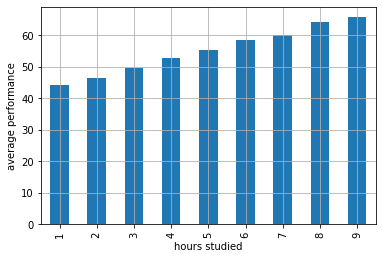

In [10]:
g2 =df.groupby('Hours Studied')['Performance Index'].mean()
g2.plot(kind = 'bar')
plt.xlabel('hours studied')
plt.ylabel('average performance')
plt.grid()
plt.show()

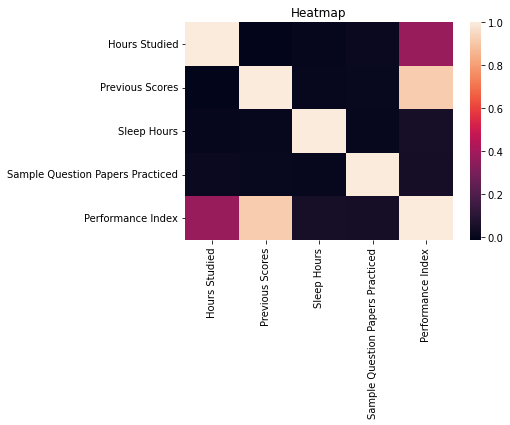

In [11]:
cm = df.corr()
sns.heatmap(cm)
plt.title('Heatmap')
plt.show()

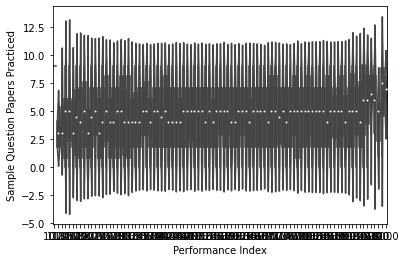

In [12]:
sns.violinplot(data=df,x="Performance Index",y="Sample Question Papers Practiced")
plt.xlabel("Performance Index")
plt.ylabel("Sample Question Papers Practiced")
plt.show()

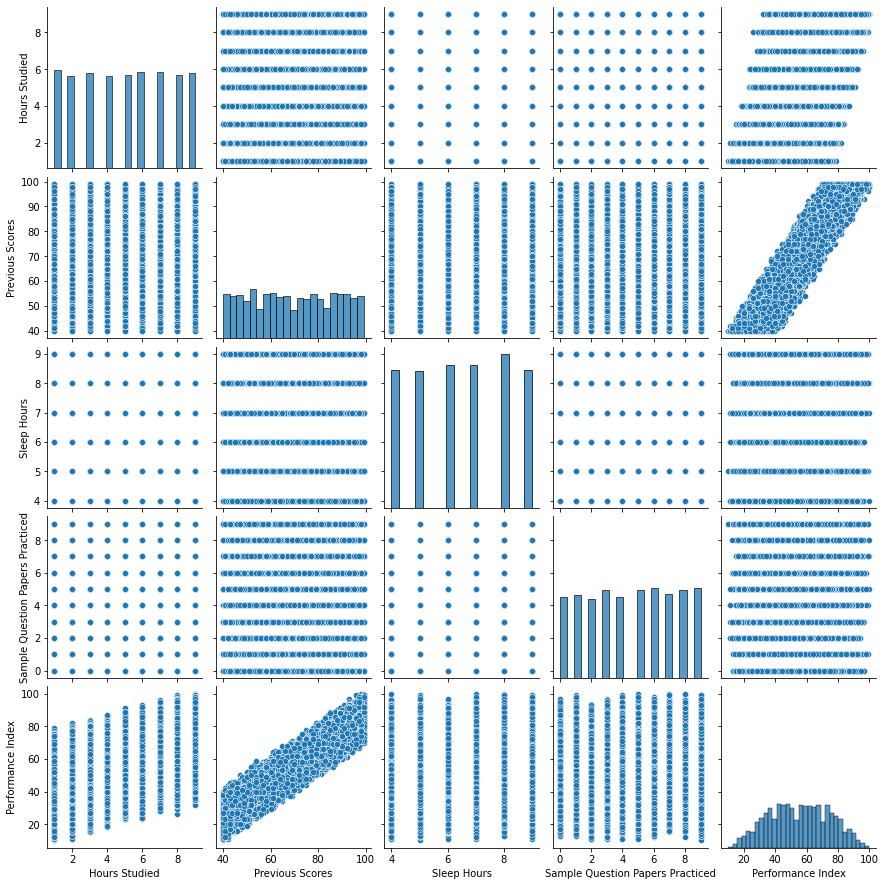

In [13]:
sns.pairplot(df)
plt.show()

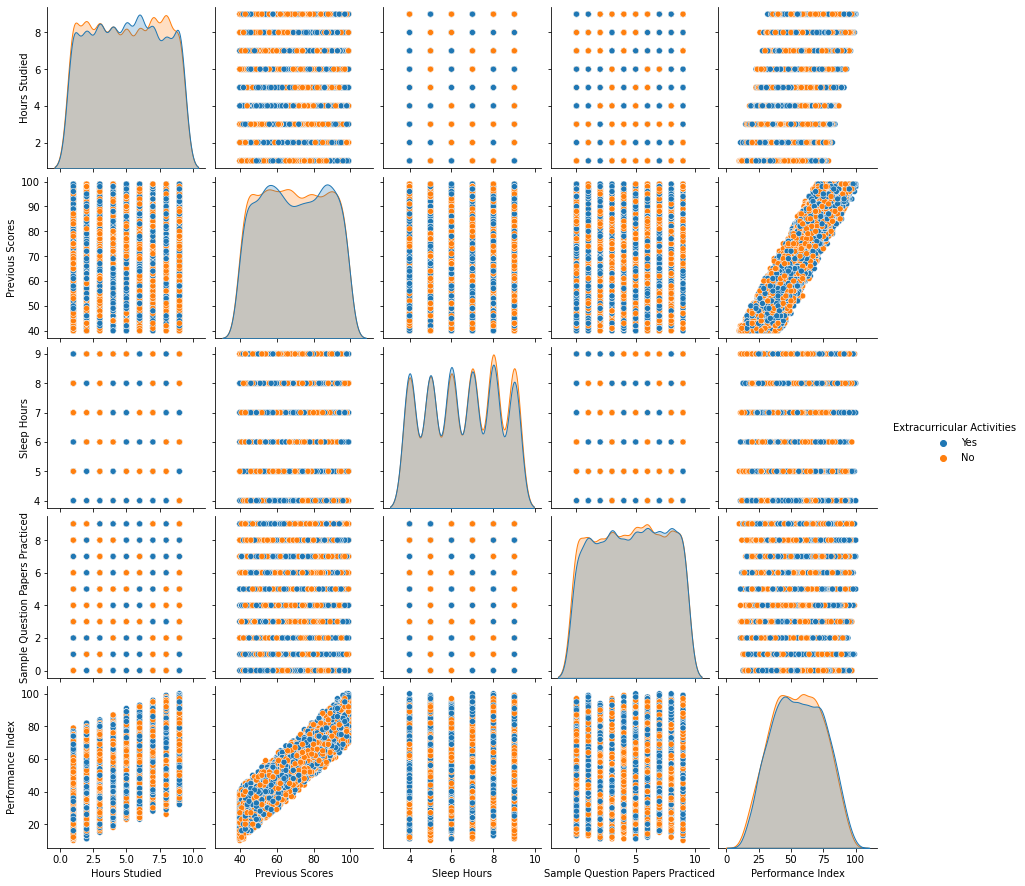

In [14]:
sns.pairplot(df, hue="Extracurricular Activities")
plt.show()

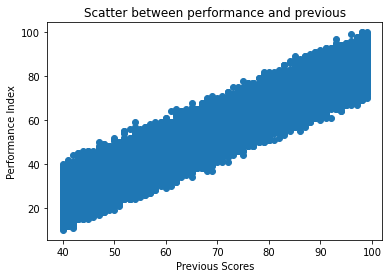

In [15]:
plt.scatter(df['Previous Scores'], df['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Scatter between performance and previous')
plt.show()

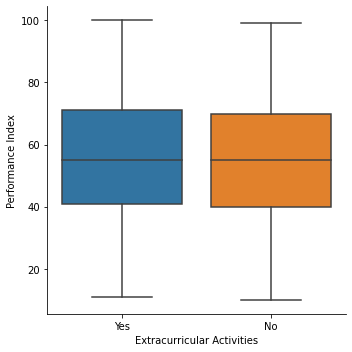

In [16]:
sns.catplot(data=df,x='Extracurricular Activities',y='Performance Index', kind='box')
plt.show()

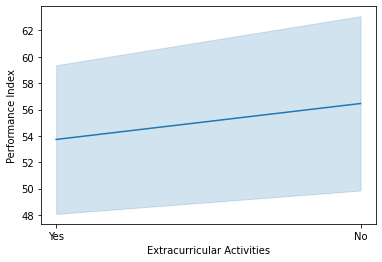

In [17]:
average_performance = df.groupby("Hours Studied")["Performance Index"].mean()
sns.lineplot(data=df, x="Extracurricular Activities", y=average_performance)
plt.show()

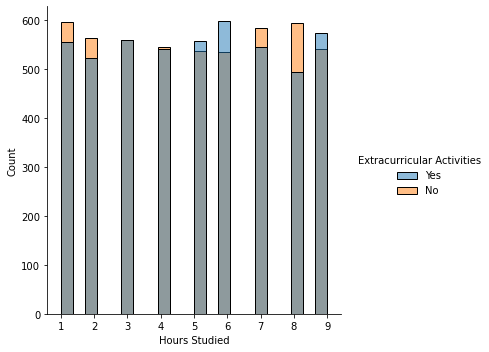

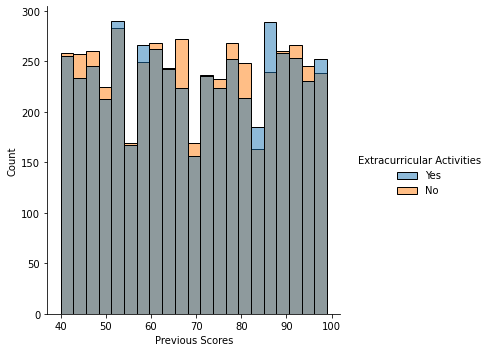

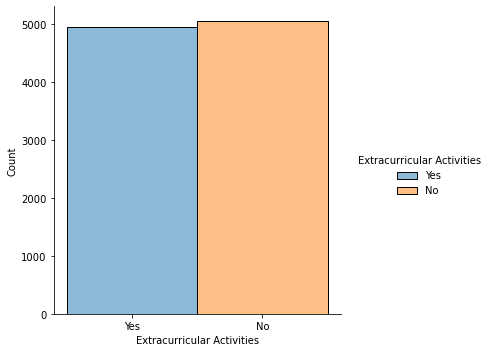

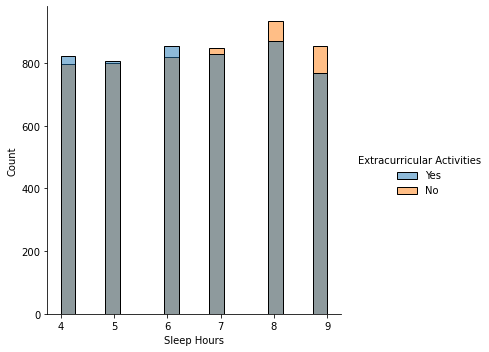

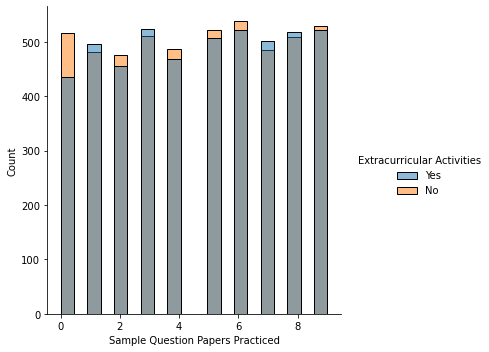

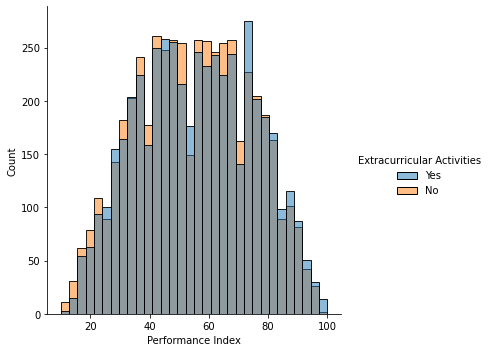

In [18]:
for column in df.columns:
    sns.displot(data=df, x=column, hue="Extracurricular Activities")

<AxesSubplot:>

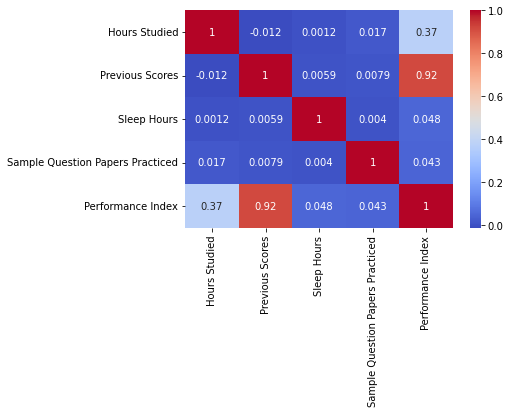

In [19]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


In [22]:
target_corr = df.corr()["Performance Index"]
sns.heatmap(target_corr.drop("Performance Index"), annot=True, cmap="coolwarm")

IndexError: Inconsistent shape between the condition and the input (got (4, 1) and (4,))

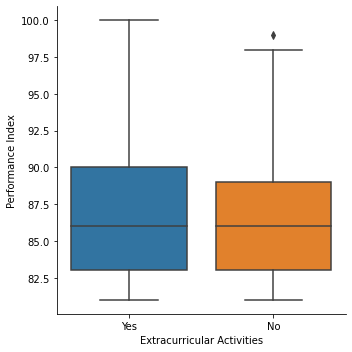

In [23]:
top_students = df[df["Performance Index"] >= df["Performance Index"].quantile(0.9)]
sns.catplot(data=top_students, x="Extracurricular Activities", y="Performance Index", kind="box")

<AxesSubplot:xlabel='Previous Scores', ylabel='Performance Index'>

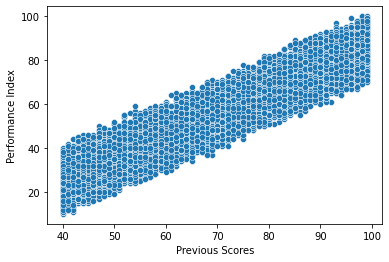

In [24]:
sns.scatterplot(data=df, x="Previous Scores", y="Performance Index")

In [25]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'No'

In [ ]:
y_pred = model.predict(X_test)
performance_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)